In [43]:
! pip3 install lazypredict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = "ticks", color_codes=True)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\vishi\\anaconda3\\Lib\\site-packages\\~klearn\\metrics\\cluster\\_expected_mutual_info_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached xgboost-1.1.1-py3-none-win_amd64.whl (54.4 MB)
  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)
  Using cached PyYAML-5.3.1-cp38-cp38-win_amd64.whl (219 kB)
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached scikit_learn-0.23.1-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached pandas-1.0.5-cp38-cp38-win_amd64.whl (8.9 MB)
  Using cached tqdm-4.56.0-py2.py3-none-any.whl (72 kB)
  Using cached pytest-5.4.3-py3-none-any.whl (248 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [44]:
ad = pd.read_csv('dataset.csv')
print(ad.shape)

(958524, 45)


In [45]:
ad.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [46]:
def extract_neo(df):
    neo = df.loc[df.neo == 'Y',:]
    neo.to_csv('neo.csv')
    return neo

In [47]:
def extract_pha(df):
    pha = df.loc[df.pha == 'Y',:]
    pha.to_csv('pha.csv')
    return pha

In [48]:
def extract_neo_pha(df):
    neo_pha = df.loc[df.pha == 'Y' & df.neo == 'Y',:]
    neo_pha.to_csv('neo_pha.csv')
    return neo_pha

In [49]:
def plot_scatter(df, params):
    for i in params:
        g = sns.FacetGrid(df, col = "class", hue = "pha")
        g.map(sns.scatterplot, "moid", i, alpha = .7)
        h = sns.FacetGrid(df, col = "class", hue = "pha")
        h.map(sns.scatterplot, "H", i, alpha = .7)
        g.add_legend()
        h.add_legend()
        plt.show()

In [50]:
neo = extract_neo(ad)
neo.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
432,a0000433,2000433,433 Eros (1898 DQ),433,Eros,NaN,Y,N,10.4,16.840,...,4.087800e-08,2.163900e-07,2.439200e-07,3.784900e-07,1.179600e-10,5.555100e-11,6.918600e-07,6.381100e-08,AMO,0.27423
718,a0000719,2000719,719 Albert (1911 MT),719,Albert,NaN,Y,N,15.4,NaN,...,2.910800e-06,1.657500e-05,1.682700e-05,2.521300e-06,3.914800e-09,3.309000e-10,1.030600e-05,2.252800e-06,AMO,0.39148
886,a0000887,2000887,887 Alinda (1918 DB),887,Alinda,NaN,Y,N,13.8,4.200,...,5.204700e-06,2.722800e-05,2.832100e-05,1.215100e-05,1.077600e-08,1.054100e-09,4.898000e-05,5.913600e-06,AMO,0.50197
1035,a0001036,2001036,1036 Ganymed (1924 TD),1036,Ganymed,NaN,Y,N,9.4,37.675,...,4.053800e-06,7.192300e-06,7.608300e-06,2.395500e-06,3.708300e-09,3.085200e-10,1.055200e-05,2.163400e-06,AMO,0.38253
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,N,17.7,1.000,...,5.737300e-06,2.693700e-05,2.839900e-05,8.195300e-06,1.558800e-09,3.145500e-10,2.209100e-05,8.244200e-07,AMO,0.46287


In [51]:
pha = extract_pha(ad)
pha.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
1565,a0001566,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.90,1.00,...,0.000013,0.000004,0.000007,0.000006,5.148400e-09,3.451500e-09,0.000008,1.603100e-06,APO,0.33228
1619,a0001620,2001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,15.30,2.56,...,0.000003,0.000003,0.000003,0.000003,2.121200e-10,1.355900e-10,0.000004,9.712800e-08,APO,0.40639
1861,a0001862,2001862,1862 Apollo (1932 HA),1862,Apollo,NaN,Y,Y,16.25,1.50,...,0.000003,0.000024,0.000025,0.000003,1.294700e-09,4.680600e-10,0.000006,5.513800e-07,APO,0.48568
1980,a0001981,2001981,1981 Midas (1973 EA),1981,Midas,NaN,Y,Y,15.20,3.40,...,0.000008,0.000002,0.000005,0.000002,4.577900e-09,9.749200e-10,0.000004,2.025600e-06,APO,0.39337
2100,a0002101,2002101,2101 Adonis (1936 CA),2101,Adonis,NaN,Y,Y,18.80,0.60,...,0.000010,0.000430,0.000430,0.000011,2.478900e-09,4.316600e-10,0.000029,1.054200e-06,APO,0.73830


In [52]:
print(neo.shape)
cols = list(neo.columns)
print(cols)

(22895, 45)
['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms']


In [53]:
neo.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,2.289500e+04,22884.000000,849.000000,802.000000,760.000000,2.289500e+04,22895.000000,2.289500e+04,22895.000000,22895.000000,...,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,2.289400e+04,22895.000000
mean,4.961196e+06,22.869623,1.168998,0.180098,0.132906,2.458357e+06,58356.383621,2.018272e+07,0.443916,1.782582,...,4.275990e-03,1.563366e-01,2.307824e-01,6.378381e-01,1.126429e+00,5.845519e-02,7.390881e-03,1.970858e+00,6.690836e+01,0.599343
std,8.557436e+06,2.984606,1.918393,0.139816,0.261699,1.437415e+03,1437.415398,3.964207e+04,0.176964,2.426534,...,1.003328e-01,4.000889e+00,5.854722e+00,1.142163e+01,2.177551e+01,1.631185e+00,1.621667e-01,5.276196e+01,5.798040e+03,17.752762
min,2.000433e+06,9.400000,0.002500,0.009000,0.000500,2.444222e+06,44221.000000,1.979121e+07,0.002846,0.555418,...,2.616800e-10,4.087800e-08,2.163900e-07,2.439200e-07,2.103800e-07,4.846400e-11,2.860900e-11,3.088400e-07,2.335200e-08,0.037189
25%,3.397572e+06,20.600000,0.351000,0.057250,0.013000,2.458752e+06,58752.000000,2.019093e+07,0.313677,1.310277,...,5.399150e-07,3.627075e-05,5.417475e-05,1.151825e-04,1.852925e-04,1.955750e-07,5.070625e-08,2.849250e-04,9.735950e-05,0.396545
50%,3.690053e+06,23.100000,0.700000,0.153500,0.038000,2.459000e+06,59000.000000,2.020053e+07,0.457464,1.713459,...,2.260500e-05,1.760500e-03,5.113850e-04,1.676300e-03,5.144550e-02,3.874950e-04,1.452150e-04,2.431700e-02,1.924850e-01,0.472730
75%,3.789664e+06,25.183500,1.400000,0.268750,0.148000,2.459000e+06,59000.000000,2.020053e+07,0.569426,2.194203,...,1.818450e-04,1.423375e-02,3.848025e-03,1.289375e-02,2.697075e-01,3.972650e-03,1.056125e-03,3.016675e-01,1.964025e+00,0.555490
max,5.401723e+07,33.200000,37.675000,0.856000,3.496000,2.459000e+06,59000.000000,2.020053e+07,0.996476,352.628376,...,8.188100e+00,3.845900e+02,5.681800e+02,7.960800e+02,2.013800e+03,1.690400e+02,1.672300e+01,4.949200e+03,8.711000e+05,2686.600000


In [54]:
new_ad = ad[ad['pha'].notna()]
new_ad = new_ad[new_ad['neo'].notna()]

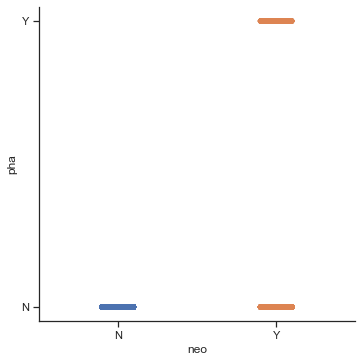

In [55]:
sns.catplot(x = "neo", y = "pha", data = new_ad)
plt.show()

In [56]:
param_imp = ['diameter', 'albedo', 'e', 'a', 'q', 'i', 'tp']

In [57]:
neo[param_imp].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22895 entries, 432 to 958521
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  849 non-null    float64
 1   albedo    802 non-null    float64
 2   e         22895 non-null  float64
 3   a         22895 non-null  float64
 4   q         22895 non-null  float64
 5   i         22895 non-null  float64
 6   tp        22895 non-null  float64
dtypes: float64(7)
memory usage: 1.4 MB


In [58]:
neo[param_imp].describe()

,diameter,albedo,e,a,q,i,tp
count,849.000000,802.000000,22895.000000,22895.000000,22895.000000,22895.000000,2.289500e+04
mean,1.168998,0.180098,0.443916,1.782582,0.913972,12.519644,2.458346e+06
std,1.918393,0.139816,0.176964,2.426534,0.232710,11.125158,1.457585e+03
min,0.002500,0.009000,0.002846,0.555418,0.070511,0.013518,2.444268e+06
25%,0.351000,0.057250,0.313677,1.310277,0.783904,4.580640,2.458453e+06
50%,0.700000,0.153500,0.457464,1.713459,0.963881,8.843493,2.458868e+06
75%,1.400000,0.268750,0.569426,2.194203,1.068407,17.741780,2.459087e+06
max,37.675000,0.856000,0.996476,352.628376,1.299988,165.541000,2.460373e+06


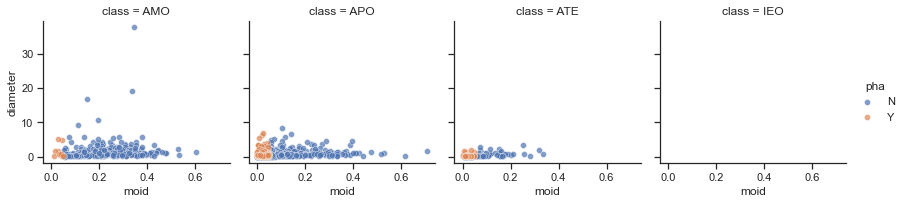

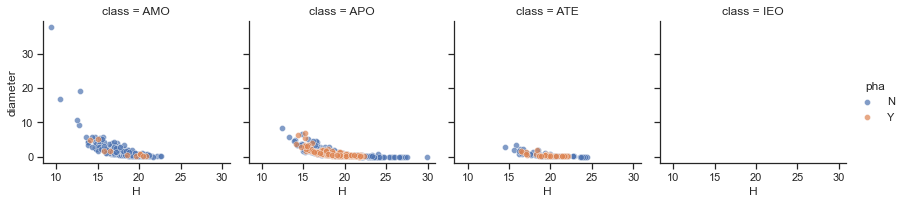

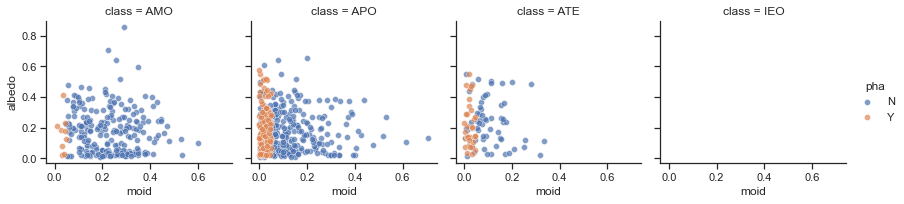

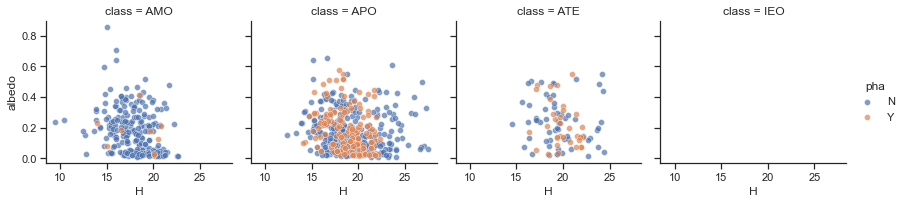

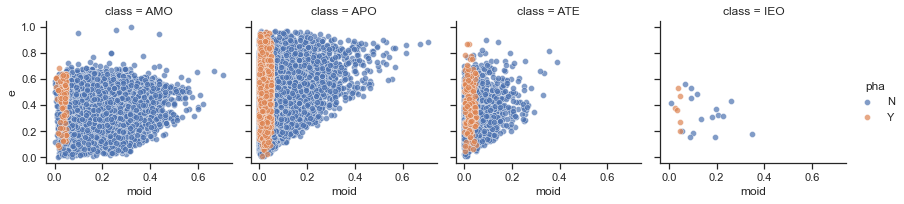

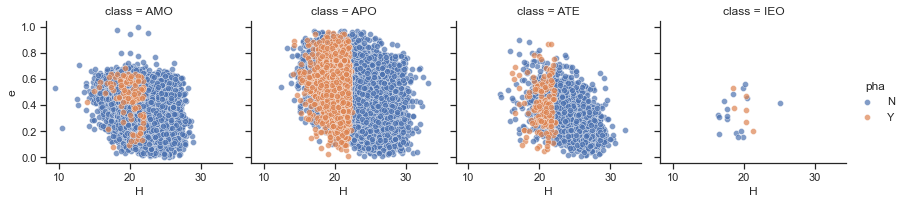

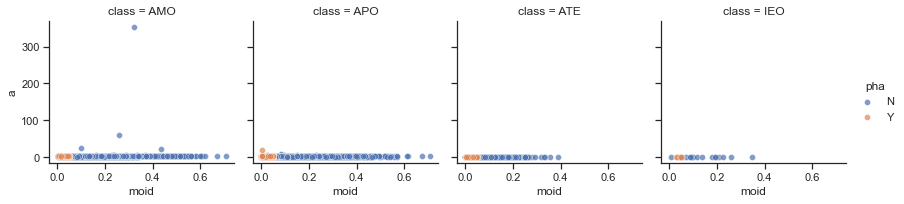

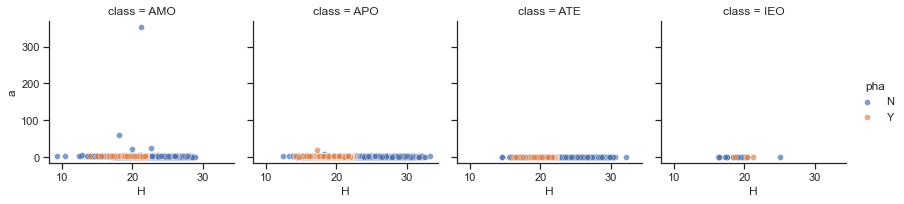

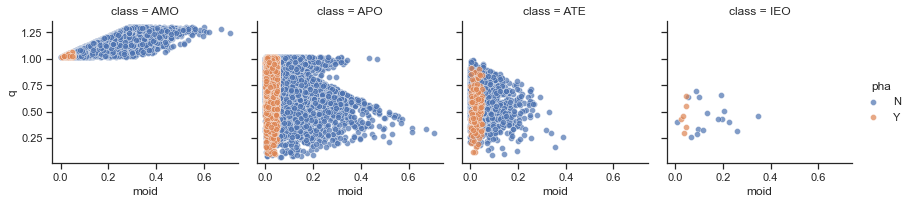

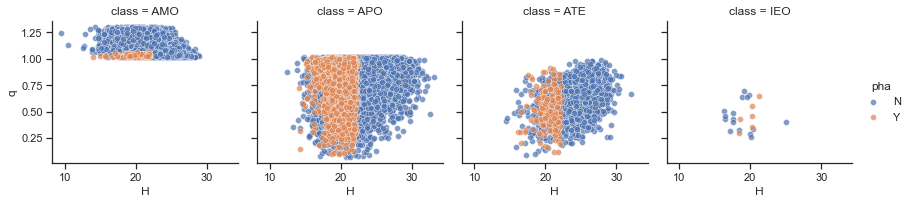

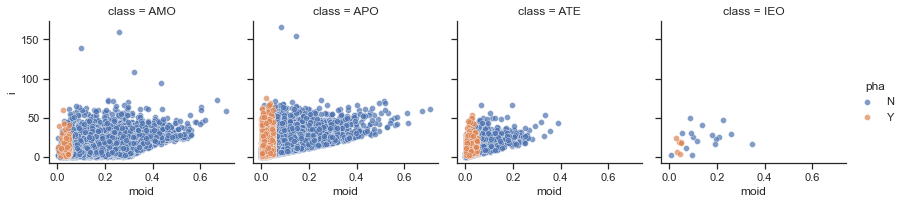

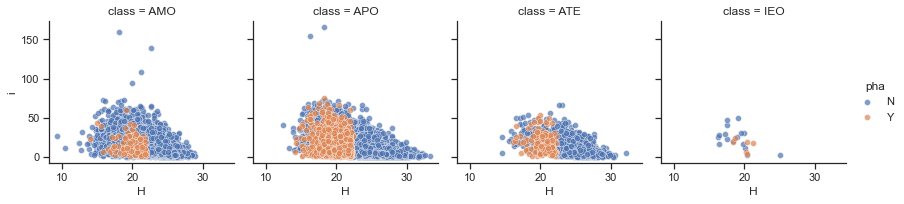

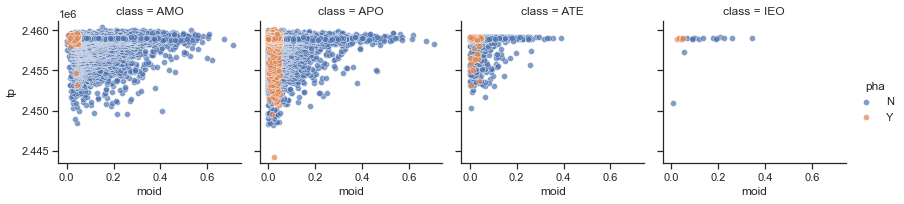

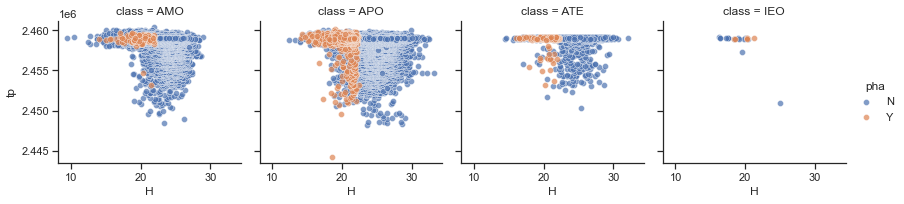

In [59]:
plot_scatter(neo, param_imp)

In [60]:
param_oth = ['om', 'w', 'ma', 'ad', 'n', 'rms']

In [61]:
neo[param_oth].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22895 entries, 432 to 958521
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      22895 non-null  float64
 1   w       22895 non-null  float64
 2   ma      22895 non-null  float64
 3   ad      22895 non-null  float64
 4   n       22895 non-null  float64
 5   rms     22895 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


In [62]:
neo[param_oth].describe()

,om,w,ma,ad,n,rms
count,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000
mean,172.560956,181.982241,171.727375,2.651191,0.518787,0.599343
std,103.490498,104.201613,121.187638,4.836224,0.280655,17.752762
min,0.025992,0.007924,0.005210,0.653773,0.000149,0.037189
25%,82.401768,92.478178,52.424668,1.707376,0.303242,0.396545
50%,172.457893,184.088932,163.400370,2.478915,0.439434,0.472730
75%,253.722575,271.584225,290.269795,3.394601,0.657142,0.555490
max,359.977940,359.982032,359.998040,704.014132,2.381082,2686.600000


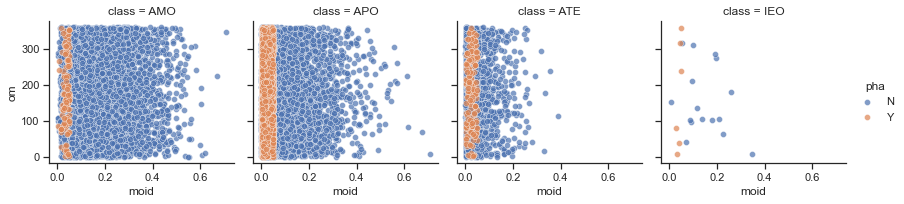

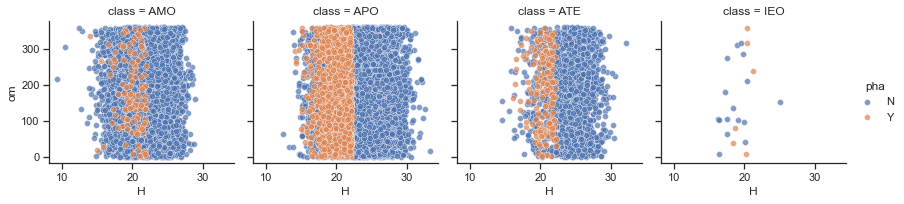

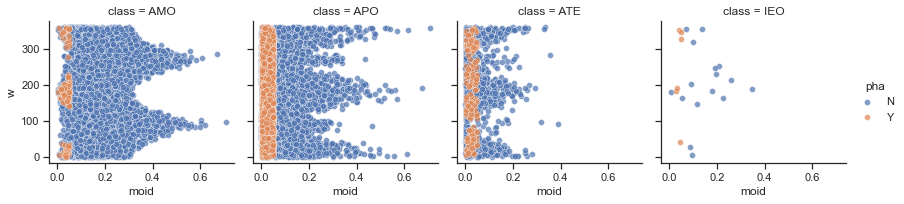

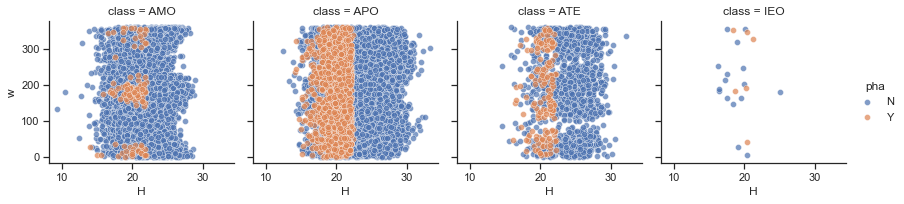

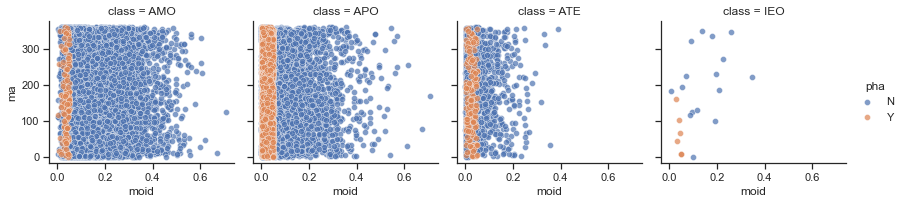

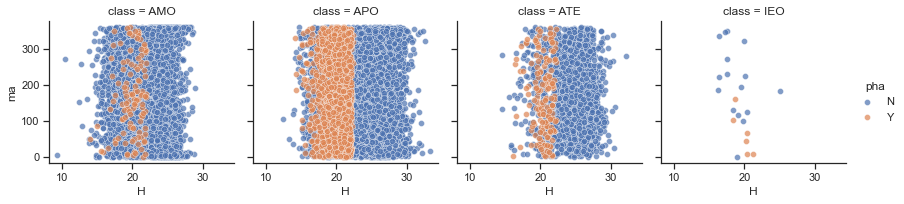

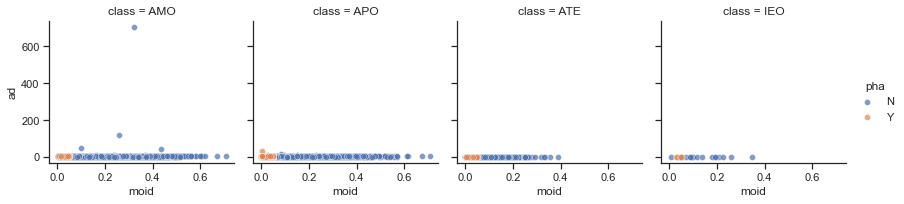

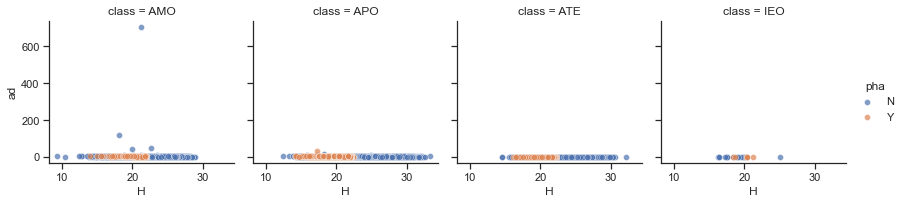

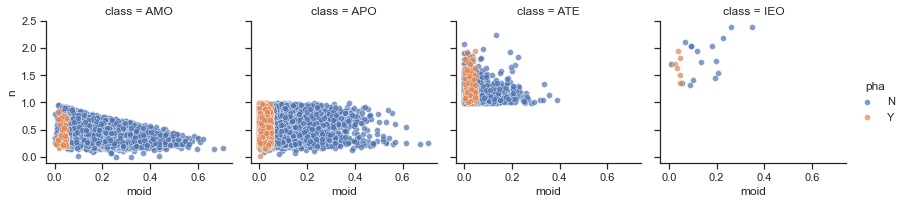

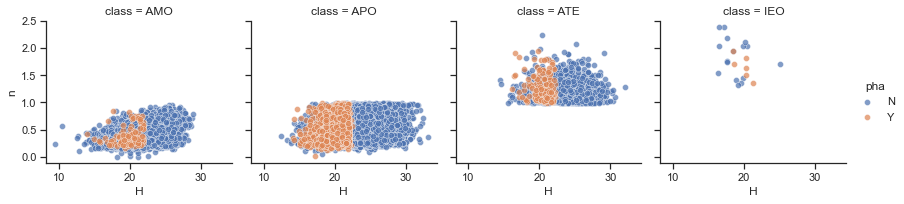

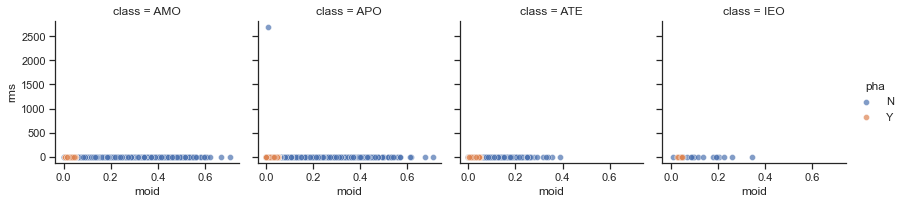

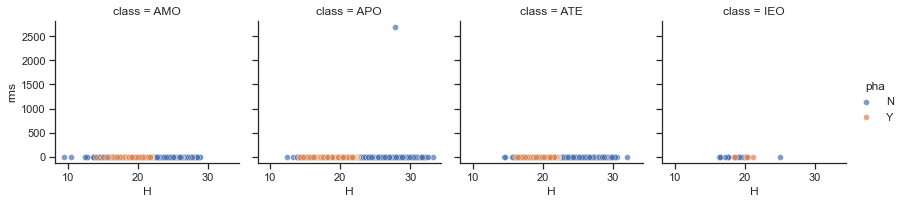

In [63]:
plot_scatter(neo, param_oth)